In [378]:
import YouTube_Data_Story as ds
import YouTube_Data_Wrangling as dw
from matplotlib.gridspec import GridSpec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import requests
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, ttest_ind_from_stats
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
pd.options.display.float_format = '{:,.2f}'.format

In [434]:
#DataFrames
df_usa=dw.combined_usa_mx_df[dw.combined_usa_mx_df.country=='USA']
df_mx=dw.combined_usa_mx_df[dw.combined_usa_mx_df.country=='Mexico']


df_usa_views_log=np.log10(df_usa['views']+1)
df_usa_likes_log=np.log10(df_usa['likes']+1)
df_usa_dlikes_log=np.log10(df_usa['dislikes']+1)
df_usa_comments_log=np.log10(df_usa['comment_count']+1)

#Shows in USA
shows_usa_df=dw.combined_usa_mx_df.loc[dw.combined_usa_mx_df.category_name=='Shows']


In [463]:
#FUNCTIONS:

def ecdf(data):
    x=np.sort(data)
    y=np.arange(1,len(x)+1)/len(x)
    _=plt.plot(x,y,marker='.',linestyle='none') 

def vertical_line(df, func, label, color, text_place):
    _=plt.axvline(func(df), color=color, linestyle=':', label=label, lw=2.5)
    _=plt.text(func(df),text_place,'{:,.2f}M' .format((func(df))/1000000),rotation=90, fontsize=15)


####  Scenario 1:
For YouTube (Client) to consider investing properly in people, infrastructure etc, they need to know audience engagement with the videos in both countries. 
For this they need to know the views/likes/dislikes/comment_count distribution and a 95% confidence interval around the population mean. 
We consider df_usa_views to be a sample and we are inferening population statistics for all the video views across all categories in USA. 


.95% of the views for USA are under: 8.89M
.50% of the views for USA are under: 0.67M
.The PEAK of the distribution is closer to it's median 0.67M, rather than mean 2.33M
...This is expected behavior from a left skewed distribution
.Other statistics of the views in the USA:
.Mean= 2.33M
.Standard Error ~ STD population = 7.26M
.Median= 0.67M


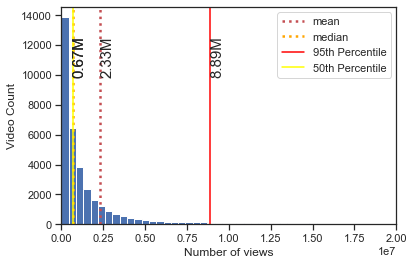

In [484]:
#Finding population statistics of the "views" in the USA

# 1. Finding Standard Deviation (Standard Error), Mean, Median, 95th Percentile, 
# Margin of Error for the distribution df_usa['views']

df_usa_views=df_usa['views']
std=np.std(df_usa['views'], ddof=1)
mean=np.mean(df_usa['views'])
median=np.median(df_usa['views'])
percent95= np.percentile(df_usa['views'], 95)

# 2. Plotting hist distribution of 'views' in USA

_=plt.hist(df_usa['views'], bins=500)
#Almost all of the videos in USA got views under 20 million mark therefore I set the xlim(0, 20Million)
_=plt.xlim([0, 20000000]) #20 million
_=plt.xlabel("Number of views")
_=plt.ylabel("Video Count")

#Mean
vertical_line(df_usa_views, np.mean, 'mean', 'r', 10000)

#Median
vertical_line(df_usa_views, np.median, 'median', 'orange', 10000)

#95th and 50th percentile data
_=plt.axvline(percent95, color='red', label='95th Percentile')
_=plt.text(percent95,10000,'{:,.2f}M' .format(percent95/1000000),rotation=90, fontsize=15)
_=plt.legend(loc=0)

#Commentary

print(".95% of the views for USA are under: " + '{:,.2f}M' .format(percent95/1000000))
print(".The PEAK of the distribution is closer to it's median {:,.2f}M, rather than mean {:,.2f}M".format(median/1000000, mean/1000000))
print("...This is expected behavior from a left skewed distribution")
print(".Other statistics of the views in the USA:")
print('.Mean= {:,.2f}M'.format(mean/1000000))
print('.Standard Error ~ STD population = {:,.2f}M'.format(std/1000000))
print('.Median= {:,.2f}M'.format(median/1000000))

In [483]:
# Hypothetical Question: How likely it is to find sample views > 3M willing to take type 1 error chance with probablity 1%
# H0: mean views (mu) > 3M (assuming it is true)
# H1: mean views (mu) <=3M 

#Since we need to find one sided answer (> 3M) we can use t-test here. 

mu = 3000100  #3M + 100 (to barely make H0 true)

p=0.01 #1% prob of accepting type1 error
size=len(df_usa)
df=size -1
t_critical = t.ppf(p, df)
t_critical = t_critical

t_threshold_value= (mean-mu)/(std/(np.sqrt(size)))

#t_critical value shows are where the 99% of the values of this sample lie. We need to 
#flip the sign of t_critical here since we are interested in values > mean 2.33M

print("t_critical from t-table (flipped): " + str(-1*t_critical))
print("t_threshold_value from sample data and mu value: " + str(t_threshold_value))



t_critical from t-table (flipped): 2.3264522612865988
t_threshold_value from sample data and mu value: -17.502649316963286


### Analysis
#### The t threshold value is not within 1% part of the curve on the right tail of the histogram curve. Infact it is way off to the other side of the curve (-17.5). 
#### Therefore null hypothesis is rejected in favor of alternative hypothesis based on the sample data provided for analysis. 



####  Scenario 2:
The shows category in USA data showed the most increment change (553%) {see data story ipnynb @/github.com/fariha23/YouTube_Data_Analysis_Video_Categories/} 
YouTube would like to know how likely it is to see the views between the higher end of the views acquired by Shows category. Lets say they want to see how likely it is that a new Shows video will acquire between 1.2M - 1.4M views

In [417]:
temp=shows_usa_df['views']
shows_usa_views_df=temp.reset_index(drop=True)

(3673, 1445949, 816506.4, 1107598.0)

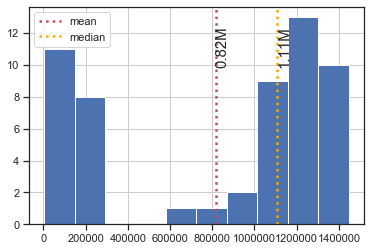

In [466]:
shows_usa_views_df.hist()

#Mean
vertical_line(shows_usa_views_df, np.mean, 'mean', 'r', 10)
#Median
vertical_line(shows_usa_views_df, np.median, 'median', 'orange', 10)
_=plt.legend(loc=0)

np.min(shows_usa_views_df), np.max(shows_usa_views_df), np.mean(shows_usa_views_df), np.median(shows_usa_views_df)

In [ ]:
# SCRATCH PAD
### print('.Margin_Error= {:,.2f}M'.format(ME/1000000))
### print('.CI_left= {:,.2f}M'.format(CI_lower_end/1000000))
### print('>>>>>>>>>>>>>>>')

#2. Using t-table (because it's one sided hist) calculating ME, CI
#Keeping alpha = 0.05

#p=0.05
#size=len(df_usa)
#df=size -1
#t_critical = t.ppf(p, df)

#SE=std/np.sqrt(size)
#ME=t_critical * SE
#CI_lower_end=mean+ME